# Criando a estrutura do grafo

In [2]:
from typing import TypedDict
from langchain.chat_models import init_chat_model

class State(TypedDict):
    topic: str
    model: init_chat_model
    prompt: str
    response: str

### Criando único Nó

In [3]:
def node_generation(state: State) -> State:
    topic = state["topic"]
    model = state["model"]
    prompt = state["prompt"]
    final_prompt = prompt.format(topic=topic)
    response = model.invoke(final_prompt)
    return {
        "response": response.content
    }
    

### Criando conexão dos nós

In [4]:
from langgraph.graph import START, END
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)

# nós
graph_builder.add_node("generation_node", node_generation)

# edges
graph_builder.add_edge(START, "generation_node")
graph_builder.add_edge("generation_node", END)

### Compilando grafo

In [5]:
graph_compiled = graph_builder.compile()

### Plotando grafo

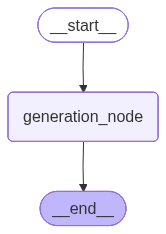

In [6]:
from IPython.display import display, Image

display(Image(graph_compiled.get_graph().draw_mermaid_png()))

# Rodando o grafo

In [10]:
llm_groq = init_chat_model(
    model="groq:openai/gpt-oss-120b", 
    temperature=0, 
    timeout=10, 
    max_tokens=8000
)

topic = "Senna vs Prost"
prompt = """
Você deverá saber discutir sobre um certo tópico, seja imparcial e traga dois argumentos para cada lado

** Tópico **
{topic}
"""

state = {
    "model": llm_groq,
    "topic": topic,
    "prompt": prompt,
    "response": ""
}

response_graph = graph_compiled.invoke(state)

In [11]:
response_graph

{'topic': 'Senna vs Prost',
 'model': ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7702cd4bda90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7702cd4be490>, model_name='openai/gpt-oss-120b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'), request_timeout=10.0, max_tokens=8000),
 'prompt': '\nVocê deverá saber discutir sobre um certo tópico, seja imparcial e traga dois argumentos para cada lado\n\n** Tópico **\n{topic}\n',
 'response': '**Senna vs. Prost – Uma análise imparcial da rivalidade**\n\nA rivalidade entre Ayrton Senna e Alain\u202fProst marcou a história da Fórmula\u202f1 nos anos 1980‑e‑1990. Ambos foram campeões mundiais, mas suas personalidades, estilos de pilotagem e estratégias de corrida eram bastante diferentes. A seguir, apresento dois argumentos que favorecem cada um, sem pretender eleger um “vencedor” definitivo, mas destacando os pontos fortes de cada piloto.\n\n---\n\n## **Argument

In [12]:
print(response_graph["response"])

**Senna vs. Prost – Uma análise imparcial da rivalidade**

A rivalidade entre Ayrton Senna e Alain Prost marcou a história da Fórmula 1 nos anos 1980‑e‑1990. Ambos foram campeões mundiais, mas suas personalidades, estilos de pilotagem e estratégias de corrida eram bastante diferentes. A seguir, apresento dois argumentos que favorecem cada um, sem pretender eleger um “vencedor” definitivo, mas destacando os pontos fortes de cada piloto.

---

## **Argumentos a favor de Ayrton Senna**

| # | Argumento | Explicação |
|---|-----------|------------|
| **1** | **Domínio em condições de chuva e em circuitos de rua** | Senna ficou conhecido como “o rei da chuva”. Suas performances em pistas molhadas – como o GP de Mônaco de 1984, o GP de Portugal de 1985 e o GP de San Marino de 1994 – foram quase imbatíveis, demonstrando um controle de carro e uma sensibilidade ao limite de aderência que poucos pilotos conseguiram reproduzir. Essa habilidade lhe rendeu vitórias decisivas e consolidou sua reput